# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [3]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [4]:

# filepath = "pima-indians-diabetes.csv"
# names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         # "bmi", "pedigree_function", "age", "has_diabetes"]
# diabetes_df = pd.read_csv(filepath, names=names)

In [5]:
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]

diabetes_df = pd.read_csv('/content/drive/MyDrive/CSV/pima-indians-diabetes.csv', names = names)
diabetes_df

,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Check the top 5 samples of the data

In [6]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
315,2,112,68,22,94,34.1,0.315,26,0
685,2,129,74,26,205,33.2,0.591,25,0
762,9,89,62,0,0,22.5,0.142,33,0
751,1,121,78,39,74,39.0,0.261,28,0
459,9,134,74,33,60,25.9,0.460,81,0


In [7]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [8]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [10]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [11]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [12]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [13]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [14]:

model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 15ms/step - loss: 0.9480 - accuracy: 0.3611 - val_loss: 0.9814 - val_accuracy: 0.4271
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.8615 - accuracy: 0.4462 - val_loss: 0.8983 - val_accuracy: 0.4844
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7940 - accuracy: 0.5174 - val_loss: 0.8321 - val_accuracy: 0.5365
Epoch 4/200
18/18 [==============================] - 0s 5ms/step - loss: 0.7412 - accuracy: 0.5625 - val_loss: 0.7792 - val_accuracy: 0.5625
Epoch 5/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.5885 - val_loss: 0.7370 - val_accuracy: 0.5885
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6659 - accuracy: 0.6233 - val_loss: 0.7035 - val_accuracy: 0.6042
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6395 - accuracy: 0.6441 - val_loss: 0.6760 - val_accuracy: 0.6354
Epoch 8/200


In [15]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = (model.predict(X_test_norm) > 0.5).astype('int32')
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [16]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [17]:
y_pred_prob_nn_1[:10]

array([[0.5313823 ],
       [0.6412299 ],
       [0.3231302 ],
       [0.24343958],
       [0.14932704],
       [0.51559126],
       [0.03945347],
       [0.35684595],
       [0.9213721 ],
       [0.18387778]], dtype=float32)

Create the plot_roc function

In [18]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.771
roc-auc is 0.819


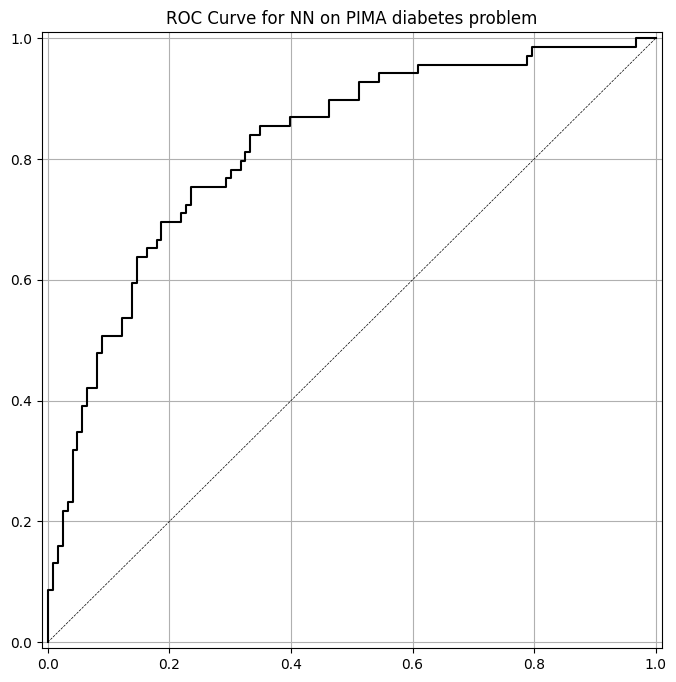

In [19]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [20]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

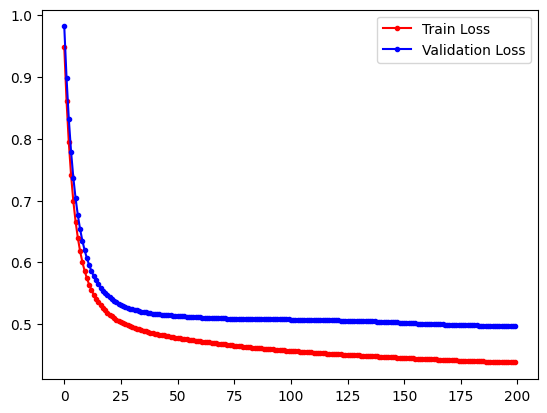

In [21]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

> Based on the result, the model performs better on the training and it performs worse at validaiton. At 200 epoch, we can see that the model starts to form a plateau, which indicates that 200 epoch is where is it most likely to best perform.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

### Dataset

In [22]:
supple_df = pd.read_csv('/content/drive/MyDrive/CSV/Cancer.csv')
supple_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [23]:
supple_df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [24]:
# Removing unnecessary columns
supple_df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [25]:
supple_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
supple_df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

> No missing values

### Splitting the data

In [27]:
x = supple_df.drop(["diagnosis"], axis = 1)
y = supple_df.diagnosis

In [28]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [29]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [30]:
LE = LabelEncoder()
y = LE.fit_transform(y)

In [31]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [32]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=11111)

In [34]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [35]:
x.shape

(569, 30)

### Build a model with two hidden layers, each with 6 nodes

In [36]:
supple_model  = Sequential([
    Dense(6, input_shape=(30,), activation="relu"),
    Dense(6, input_shape=(30,), activation="relu"),
    Dense(1, activation="sigmoid")
])

### Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer

In [37]:
# done on previous code block

### Use a learning rate of .003 and train for 1500 epochs

In [38]:
supple_model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
supple_run_hist_1 = supple_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
14/14 [==============================] - 1s 26ms/step - loss: 0.7685 - accuracy: 0.5305 - val_loss: 0.7317 - val_accuracy: 0.6154
Epoch 2/1500
14/14 [==============================] - 0s 9ms/step - loss: 0.7135 - accuracy: 0.5822 - val_loss: 0.6905 - val_accuracy: 0.6503
Epoch 3/1500
14/14 [==============================] - 0s 8ms/step - loss: 0.6768 - accuracy: 0.6174 - val_loss: 0.6545 - val_accuracy: 0.6573
Epoch 4/1500
14/14 [==============================] - 0s 11ms/step - loss: 0.6469 - accuracy: 0.6174 - val_loss: 0.6237 - val_accuracy: 0.6573
Epoch 5/1500
14/14 [==============================] - 0s 7ms/step - loss: 0.6208 - accuracy: 0.6150 - val_loss: 0.5965 - val_accuracy: 0.6853
Epoch 6/1500
14/14 [==============================] - 0s 8ms/step - loss: 0.5960 - accuracy: 0.6455 - val_loss: 0.5693 - val_accuracy: 0.7063
Epoch 7/1500
14/14 [==============================] - 0s 9ms/step - loss: 0.5714 - accuracy: 0.6643 - val_loss: 0.5414 - val_accuracy: 0.7273
Epoc

In [39]:
supple_y_pred_class_nn_1 = (supple_model.predict(X_test_norm) > 0.5).astype('int32')
supple_y_pred_prob_nn_1 = supple_model.predict(X_test_norm)

5/5 [==============================] - 0s 2ms/step


In [40]:
supple_y_pred_class_nn_1[:10]

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [41]:
supple_y_pred_prob_nn_1[:10]

array([[5.1424154e-09],
       [1.0000000e+00],
       [6.6693889e-07],
       [9.9999475e-01],
       [9.6339272e-06],
       [9.0621239e-01],
       [6.9059478e-04],
       [2.3659487e-08],
       [2.0398539e-17],
       [4.5578545e-05]], dtype=float32)

### Graph the trajectory of the loss functions, accuracy on both train and test set

In [42]:
supple_run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

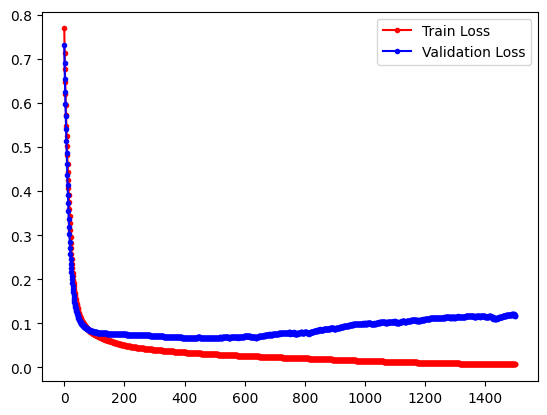

In [43]:
fig, ax = plt.subplots()
ax.plot(supple_run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(supple_run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

### Plot the roc curve for the predictions

In [44]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on Cancer'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.979
roc-auc is 0.993


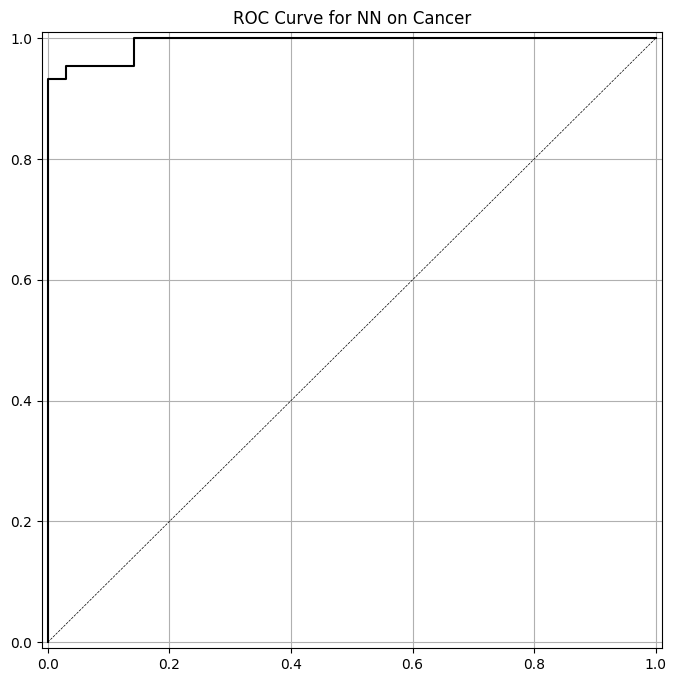

In [45]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,supple_y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,supple_y_pred_prob_nn_1)))

plot_roc(y_test, supple_y_pred_prob_nn_1, 'NN')

### Use different learning rates, numbers of epochs, and network structures

In [48]:
supple_model  = Sequential([
    Dense(6, input_shape=(30,), activation="tanh"),
    Dense(6, input_shape=(30,), activation="tanh"),
    Dense(1, activation="sigmoid")
])

In [49]:
supple_model.compile(SGD(lr = .001), "binary_crossentropy", metrics=["accuracy"])
supple_run_hist_1 = supple_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=2000)

Epoch 1/2000
14/14 [==============================] - 1s 17ms/step - loss: 0.7208 - accuracy: 0.5493 - val_loss: 0.6344 - val_accuracy: 0.6783
Epoch 2/2000
14/14 [==============================] - 0s 5ms/step - loss: 0.5660 - accuracy: 0.7441 - val_loss: 0.5086 - val_accuracy: 0.8252
Epoch 3/2000
14/14 [==============================] - 0s 5ms/step - loss: 0.4755 - accuracy: 0.8521 - val_loss: 0.4313 - val_accuracy: 0.8881
Epoch 4/2000
14/14 [==============================] - 0s 4ms/step - loss: 0.4195 - accuracy: 0.8967 - val_loss: 0.3787 - val_accuracy: 0.9231
Epoch 5/2000
14/14 [==============================] - 0s 5ms/step - loss: 0.3801 - accuracy: 0.9178 - val_loss: 0.3415 - val_accuracy: 0.9301
Epoch 6/2000
14/14 [==============================] - 0s 5ms/step - loss: 0.3507 - accuracy: 0.9202 - val_loss: 0.3134 - val_accuracy: 0.9371
Epoch 7/2000
14/14 [==============================] - 0s 5ms/step - loss: 0.3273 - accuracy: 0.9296 - val_loss: 0.2912 - val_accuracy: 0.9510
Epoch

### Plot the results of training and validation loss using different learning rates, number of epochs and network structures

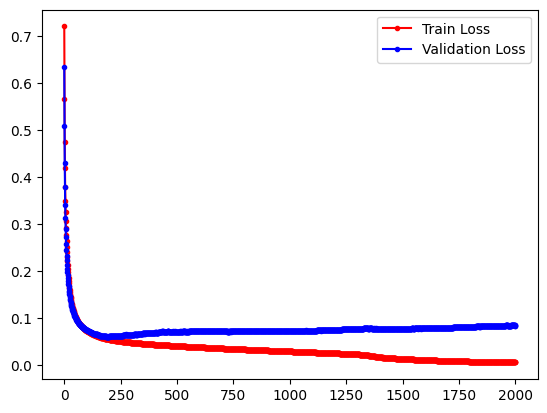

In [52]:
fig, ax = plt.subplots()
ax.plot(supple_run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(supple_run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

### Interpret your result

> Both the train loss and validation loss decrease as the number of epochs increases, which indicates that the model is learning and improving its performance. The validation loss is higher in error than the training loss, because the validation is much harder for the model. The validation loss starts to plateau on about 1000 epoch, which indicates that the model may start to overfit.

#### Conclusion

> In this activity, we learned the simple implementation of training neural networks. We explored the different parts of training where we train the model, manipulate the number of layers, and using different activation such as sigmoid, tanh, and relu. The activity proved to be useful in our journey in learning deep learning, but I must admit that majority of it is pretty confusing to me, because of the math that is involved in it. All in all, this activity helped us to explore and understand the basics of training a neural network.

https://colab.research.google.com/drive/1wTnruNsNkE_TLApj8fJu6dZAsS5Q40sQ?usp=sharing